In [2]:
#Mengimpor library yang diperlukan

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
#Mengimpor dataset

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('academy-candidates.csv')
df.head()

Saving academy-candidates.csv to academy-candidates.csv


,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [4]:
#Menampilkan informasi dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gmat             40 non-null     int64  
 1   gpa              40 non-null     float64
 2   work_experience  40 non-null     int64  
 3   admitted         40 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.4 KB


In [5]:
#Menunjukkan rangkuman statistik dari dataset

df.describe()

,gmat,gpa,work_experience,admitted
count,40.000000,40.000000,40.000000,40.000000
mean,654.000000,3.095000,3.425000,0.475000
std,61.427464,0.631218,1.737778,0.505736
min,540.000000,1.700000,1.000000,0.000000
25%,607.500000,2.700000,2.000000,0.000000
50%,660.000000,3.300000,4.000000,0.000000
75%,690.000000,3.700000,5.000000,1.000000
max,780.000000,4.000000,6.000000,1.000000


In [6]:
#Memeriksa nilai kosong

df.isnull().values.any()

False

In [7]:
#Membagi dataset ke data training dan data tes
"""
Mengatur variabel independen (x) dan dependen (y) dengan mengambilnya dari dataset dan menggunakan 
fungsi scikit-learn train_test_split untuk membagi data menjadi data testing
dan data training.
"""

X = df[['gmat','gpa','work_experience']]
y = df['admitted']

"""
Nilai 0.25 mengartikan bahwa kita menggunakan 25% dari dataset untuk testing.
Random_state memastikan reproduktivitas. Untuk output train_test_split, kita
mendapatkan nilai x_train, x_test, y_train, dan y_test.
"""

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [8]:
#Menerapkan model LogisticRegression()

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

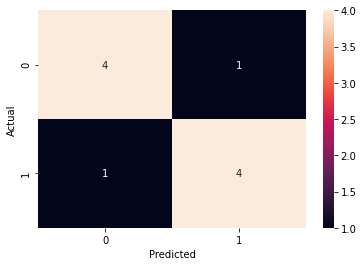

In [9]:
#Setelah LogisticRegression model diterapkan, kita dapat melihat hasil akurasi model menggunakan accuracy_score dan confusion_matrix

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [10]:
#Akurasi skor

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8


In [11]:
#Menampilkan nilai precision, recall, dan f-measure dari model LogisticRegression menggunakan dataset diabetes

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



In [12]:
print (X_test) #test dataset
print (y_pred) #predicted values

    gmat  gpa  work_experience
22   550  2.3                4
20   620  3.3                2
25   670  3.3                6
4    680  3.9                4
10   610  2.7                3
15   610  3.0                1
28   650  3.7                6
11   690  3.7                5
18   540  2.7                2
29   660  3.3                5
[0 0 1 1 0 0 1 1 0 1]
